# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

- PatientId : the Id of the patient.
- AppointmentID	: the Id of the patient appointment.
- Gender : patient gender (Male or Female).
- ScheduledDay :tells us on what day the patient set up their appointment.
- Age : the age of the patient.
- Neighborhood :indicates the location of the hospital.
- Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Patients' disease information :
            - Hipertension : 0 or 1.
            - Diabetes : 0 or 1.
            - Alcoholism : 0 or 1.
            - Handcap : 0 or 1.
- SMS_received : 1 or more messages sent to the patient.
- No-show : it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Analysis Questions in This Report
- What is the proportion of neighbourhood?
- Which gender often went to the doctor? (Male/Female)
- What is the proportion of patients which enrolled in the scholarship program?
- What is the patient more suffer from?
- What is the age distribution for hipertension patients?

### Let's start with some preparations

In [4]:
# Import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, We load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


### General Properties


In [5]:
# Load dataset
df = pd.read_csv("noshowappointments.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Know the num of rows and columns in the dataset
df.shape

(110527, 14)

In [7]:
# Know some information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
# Know about some statistics in the dataset columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Check about num of duplicated values
df.duplicated().sum()

0

In [10]:
# check about num of missing values in the dataset columns
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### After checking the dataset, found that:
#### 1- The dataset has 0 duplicates and 0 null values.
That's great!

#### 2- The age columns' values are between -1 and 115.
There are some not valid values.

#### 3- The encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
That's wrong to apply.


### Data Cleaning

#### Firstly, drop unnecessary columns for this analysis.

In [11]:
# Drop unnecessary columns for the analysis like [PatientId - AppointmentID]
# As we don't need the Ids in our analysis.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [12]:
# Check columns droped
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Then, change the columns names to lowercase.

In [13]:
# change it to lowercase to easy of use
df.columns= df.columns.str.lower()

In [14]:
# Check columns names lowercase
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Then, reverse the encoding of the [no-show] column to [showed]. 'Yes' == showed-up
#### And, encode its values as numbers instead of string

In [15]:
# Rename the column
df.rename(columns={'no-show':'showed'}, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# encode values in the 'showed' columns
df.loc[df['showed']=='No', 'showed'] = 1
df.loc[df['showed']=='Yes', 'showed'] = 0

In [17]:
# Check for values after encoding
df['showed'].value_counts()

1    88208
0    22319
Name: showed, dtype: int64

#### Finally, age column has min values equal -1. Let's try to ignore it!

In [18]:
# get the index of the -1 values in the age columns
age_indx = df[df['age']==-1].index

In [19]:
# then, drop these rows
df.drop(age_indx, inplace=True)

In [20]:
# check for age values, -1 not found
df['age'].value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned the data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. 

### What is the proportion of neighbourhood?

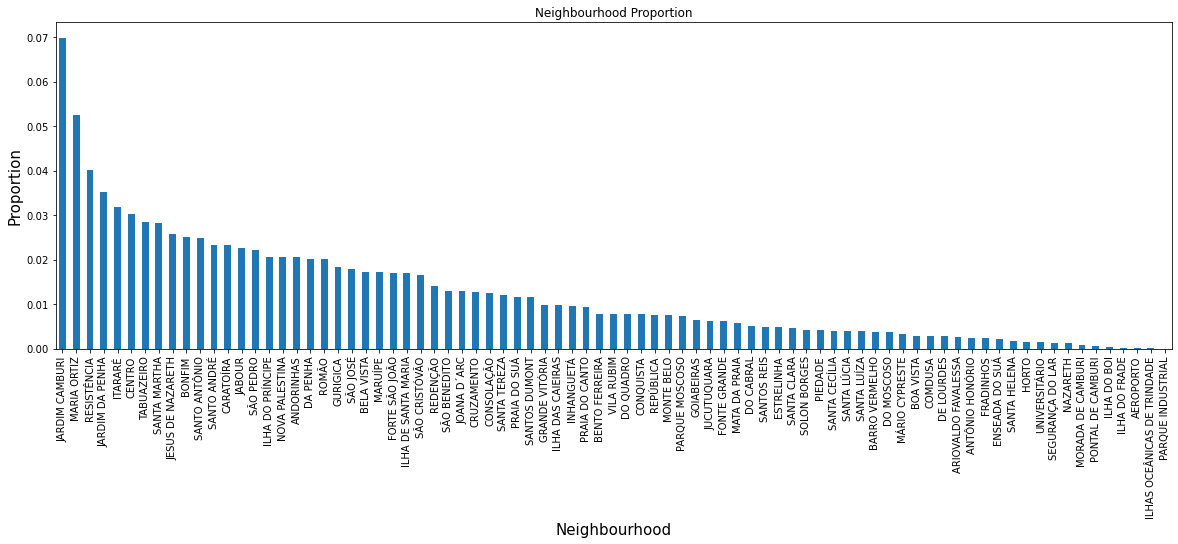

In [21]:
plt.figure(figsize = (20,6));
df['neighbourhood'].value_counts(normalize = True).sort_values(ascending=False).plot(kind='bar');

# title and labels
plt.ylabel('Proportion', fontsize=15)
plt.xlabel('Neighbourhood', fontsize=15)
plt.title('Neighbourhood Proportion');

##### 'JARDIM CAMBURI' and 'MARIA ORTIZ' are the largest proportion location of the hospitals.

### Which gender often went to the doctor? (Male/Female)

In [22]:
# Number of each gender
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [23]:
# The proportion of female only
proportion_f = df['gender'].value_counts()[0]/df.shape[0]
proportion_f

0.6499737618297957

In [24]:
# The proportion of male only
proportion_m = df['gender'].value_counts()[1]/df.shape[0]
proportion_m

0.3500262381702043

Text(0.5, 1.0, 'Gender Proportions')

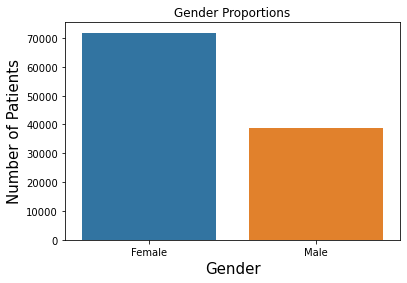

In [25]:
sns.countplot(x='gender', data=df, order=df['gender'].value_counts().index)

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of Patients', fontsize=15)
plt.title('Gender Proportions')

##### Females were went often to the doctor(65%) unlike males(35%)

### What is the proportion of patients which enrolled in the scholarship program?

In [26]:
df['scholarship'].mean()

0.09826647123753687

##### The mean of patients which enrolled in Brasilian welfare program Bolsa Família is 9.8%

### What is the patient more suffer from?

In [41]:
# hipertension proportion
hipertension_prop = df['hipertension'].mean()*100
hipertension_prop

19.724770642201836

In [42]:
# diabetes proportion
diabetes_prop = df['diabetes'].mean()*100
diabetes_prop

7.186544342507645

In [43]:
# alcoholism proportion
alcoholism_prop = df['alcoholism'].mean()*100
alcoholism_prop

3.040008685739102

In [44]:
# handcap proportion
handcap_prop = df['handcap'].mean()*100
handcap_prop

2.224815880426325

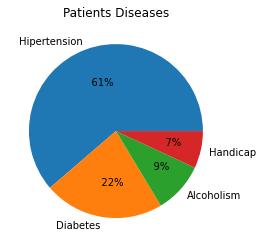

In [45]:
data = [hipertension_prop, diabetes_prop, alcoholism_prop, handcap_prop]
labels = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handicap']
plt.pie(data, labels=labels, autopct='%5.0f%%')
plt.title("Patients Diseases")
plt.show()

##### The Hipertension is more common between patients (61%) and Diabetes (22%)

### What is the age distribution for hipertension patients?

In [56]:
# function to avoid repetitive code
def plot_hist(column):
    column.hist();

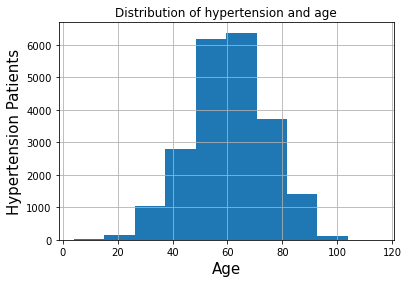

In [54]:
plot_hist(df.age[df.hipertension==1])

# title and labels
plt.title('Distribution of hypertension and age')
plt.xlabel('Age', fontsize=15);
plt.ylabel('Hypertension Patients', fontsize=15);

##### The hipertension patients mostly with age between 50 and 60 yearsold.

### What is the age distribution for diabetes patients?

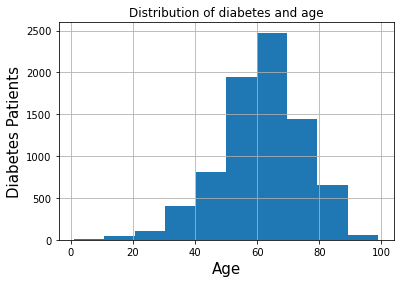

In [55]:
plot_hist(df.age[df.diabetes==1])

# title and labels
plt.title('Distribution of diabetes and age')
plt.xlabel('Age', fontsize=15);
plt.ylabel('Diabetes Patients', fontsize=15);

##### The diabetes patients mostly with age between 50 and 70 yearsold.

<a id='conclusions'></a>
## Conclusions

### Findings:
1- JARDIM CAMBURI' and 'MARIA ORTIZ' are the largest proportion location of the hospitals.

2- Females were went often to the doctor (65%) unlike males (35%).

3- The mean of patients which enrolled in Brasilian welfare program Bolsa Família is (9.8%).

4- The Hipertension is more common between patients (61%).

5- The hipertension patients mostly with age between 50 and 60 yearsold.

6- The diabetes patients mostly with age between 50 and 70 yearsold.

### Limitations:
- The dataset doesn't have an obvious hour to be able to analyse it.
- The dataset doesn't have more information about hospitals.